<a href="https://colab.research.google.com/github/AhmadNazmiZayuri/DataScience/blob/main/P146217_Nazmi_Week15_DataAnalysis_20250125_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 15: Data Analysis / Data Story Telling**

Please refer to the textbook: "[Python for Data Analysis](https://wesmckinney.com/book/)" by Wes McKinney for details of this topic on Chapter 13

In [1]:
# start by importing NumPy and pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **15.1 Bitly Data from 1.USA.gov**
In 2011, the URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil.


# this is the link: https://tinyurl.com/mbjv3ycn
# this is the long link: https://colab.research.google.com/drive/1KPsPZsIbDWDYWPW8S0vPyGQFrp22LDAL#scrollTo=TG90-7eniw1y

In [2]:
# Access the raw data here: https://bit.ly/3HbPOjE
# Save the data in a file name as example.txt
# Upload the example.txt file to your specific folder
from google.colab import files
files.upload()

{}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Move to our own folder
!mv /content/example.txt /content/drive/MyDrive/Colab_Notebooks/example.txt

mv: cannot stat '/content/example.txt': No such file or directory


In [5]:
# Create a object to save the URL string
# This file is in JSON format
path = "/content/drive/MyDrive/Colab_Notebooks/example.txt"

In [6]:
# Using json module to load the data
# [json.loads(line) for line in f] -> iterates over each line in the file (f);
# applies json.loads() to convert each line from JSON format to a Python object;
# collects these objects into a list named records
import json
with open(path) as f:
    records = [json.loads(line) for line in f]

In [7]:
# 'records' is now a list of Python dictionary
# Access the element in the records
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### **Counting Time Zones in Pure Python**
finding the time zones that **occur most often** in the dataset (***the tz field***)

In [8]:
# Create a list of time zones
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:15]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [9]:
# Define a get_counts() function
# Using dictionary to store counts
# 'counts[x] += 1' -> If an element is already present in the dictionary, it increments its count by one
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [10]:
# get the time zone count data
cts = get_counts(time_zones)
cts

{'America/New_York': 1251,
 'America/Denver': 191,
 'America/Sao_Paulo': 33,
 'Europe/Warsaw': 16,
 '': 521,
 'America/Los_Angeles': 382,
 'Asia/Hong_Kong': 10,
 'Europe/Rome': 27,
 'Africa/Ceuta': 2,
 'Europe/Madrid': 35,
 'Asia/Kuala_Lumpur': 3,
 'Asia/Nicosia': 1,
 'Europe/London': 74,
 'Pacific/Honolulu': 36,
 'America/Chicago': 400,
 'Europe/Malta': 2,
 'Europe/Lisbon': 8,
 'Europe/Paris': 14,
 'Europe/Copenhagen': 5,
 'America/Mazatlan': 1,
 'Europe/Dublin': 3,
 'Europe/Brussels': 4,
 'America/Vancouver': 12,
 'Europe/Amsterdam': 22,
 'Europe/Prague': 10,
 'Europe/Stockholm': 14,
 'America/Anchorage': 5,
 'Asia/Bangkok': 6,
 'Europe/Berlin': 28,
 'America/Rainy_River': 25,
 'Europe/Budapest': 5,
 'Asia/Tokyo': 37,
 'Europe/Vienna': 6,
 'America/Phoenix': 20,
 'Asia/Jerusalem': 3,
 'Asia/Karachi': 3,
 'America/Bogota': 3,
 'America/Indianapolis': 20,
 'America/Montreal': 9,
 'Asia/Calcutta': 9,
 'Europe/Skopje': 1,
 'Asia/Beirut': 4,
 'Australia/NSW': 6,
 'Chile/Continental': 6,
 

In [11]:
# Display top few rows of counts dictionary
for key, value in list(cts.items())[:10]:
    print(f'{key}: {value}')

America/New_York: 1251
America/Denver: 191
America/Sao_Paulo: 33
Europe/Warsaw: 16
: 521
America/Los_Angeles: 382
Asia/Hong_Kong: 10
Europe/Rome: 27
Africa/Ceuta: 2
Europe/Madrid: 35


### `f-string` is a convenient way to format the output
    - embedding the values of key and value directly into the string

In [12]:
# Accessing single element
cts['Asia/Dubai']

4

In [13]:
# Numbers of time zone in records
len(time_zones)

3440

In [14]:
# Define a top_counts() function -> to get top 10 time zones and their counts
# Output as a tuple
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [15]:
# Top ten time zones
top_counts(cts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [16]:
# Another using Counter function
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### **Counting Time Zones with pandas**

In [17]:
# Transform the records object to a pandas DataFrame
# We have tz element: (i) missing data, (ii) NaN
frame = pd.DataFrame(records)
frame.head(15)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN


In [18]:
# Basic information about the DataFrame
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [19]:
# Count tz information
tz_cts = frame['tz'].value_counts()
tz_cts.head(10)

,count
tz,
America/New_York,1251
,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36
Europe/Madrid,35


In [20]:
# Zoom in to time zone variable
frame['tz'].head(15)

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York
5,America/New_York
6,Europe/Warsaw
7,
8,
9,


In [21]:
# Filling NaN with 'NA'
# Filling missing data with 'Unknown Time Zone'
clean_tz = frame['tz'].fillna('NA') #NaN to NA
clean_tz[clean_tz == ''] = 'Unknown Time Zone' #Empty value to Unknown time Zone
tz_cts = clean_tz.value_counts()
tz_cts.head(10)

,count
tz,
America/New_York,1251
Unknown Time Zone,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
NA,120
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36


In [22]:
# Another way: chaining the methods
tz_cts = frame['tz'] \
    .fillna('NA') \
    .replace('', 'Unknown Time Zone') \
    .value_counts()

tz_cts.head(10)

,count
tz,
America/New_York,1251
Unknown Time Zone,521
America/Chicago,400
America/Los_Angeles,382
America/Denver,191
NA,120
Europe/London,74
Asia/Tokyo,37
Pacific/Honolulu,36


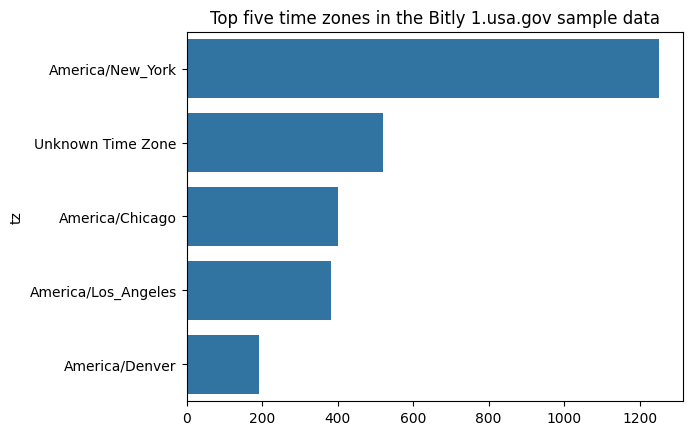

In [23]:
# From matplotlib.pyplot import title
# make a horizontal bar plot
# default for head is 5 rows if no argument is provided
subset = tz_cts.head()
ax = sns.barplot(y = subset.index, x = subset.to_numpy())
ax.set_title('Top five time zones in the Bitly 1.usa.gov sample data');

#### **Working on other field in the Bitly dataset**


In [24]:
# The "a" field contains information about the browser, device, or application
frame['a'].head(10)

,a
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...


In [25]:
# Acessing single element
frame['a'][4]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [26]:
# Takes the first 11 characters of a long string
frame['a'][4][:11]

'Mozilla/5.0'

In [27]:
# If no delimiter is specified, split() function splits the string
# based on whitespace by default
pd.Series([x.split() for x in frame['a'].dropna()])

,0
0,"[Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl..."
1,[GoogleMaps/RochesterNY]
2,"[Mozilla/4.0, (compatible;, MSIE, 8.0;, Window..."
3,"[Mozilla/5.0, (Macintosh;, Intel, Mac, OS, X, ..."
4,"[Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl..."
...,...
3435,"[Mozilla/4.0, (compatible;, MSIE, 9.0;, Window..."
3436,"[Mozilla/5.0, (Windows, NT, 5.1), AppleWebKit/..."
3437,[GoogleMaps/RochesterNY]
3438,[GoogleProducer]


In [28]:
# Gather the browser information
res = pd.Series([x.split()[0] for x in frame['a'].dropna()])
res.head(8)

,0
0,Mozilla/5.0
1,GoogleMaps/RochesterNY
2,Mozilla/4.0
3,Mozilla/5.0
4,Mozilla/5.0
5,Mozilla/5.0
6,Mozilla/5.0
7,Mozilla/5.0


In [29]:
# Make the count summary
res.value_counts().head()

,count
Mozilla/5.0,2594
Mozilla/4.0,601
GoogleMaps/RochesterNY,121
Opera/9.80,34
TEST_INTERNET_AGENT,24


## **Decompose the top time zones into Windows and non-Windows users.**

In [30]:
# First filter out missing data
cframe = frame[frame['a'].notna()].copy()
cframe[['a']]

,a
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557,GoogleMaps/RochesterNY
3558,GoogleProducer


In [31]:
# Check whether each row is of Windows operation system
# adding as a new column
cframe['os'] = np.where(cframe['a'].str.contains('Windows'),
                        'Windows', 'Not Windows')

# Display top few rows
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [32]:
# groupby time zone and os column
# Create an intermediate by_tz_os object
by_tz_os = cframe.groupby(['tz', 'os'])

In [33]:
# Using size() function to get count data
# this is a long format table -> vertically arranged
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [34]:
# 1. Reshape by_tz_os.size() into Not Windows and Windows columns -> wide format
# horizontally arranged
# 2. fillna = 0
# 3. put into variable called agg_counts
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [35]:
# Sum along the columns (axis = 1)
# R is called rowSum() axis=1, axis = 0 is colSum()
agg_counts.sum(axis = 1)

,0
tz,
,521.0
Africa/Cairo,3.0
Africa/Casablanca,1.0
Africa/Ceuta,2.0
Africa/Johannesburg,1.0
...,...
Europe/Volgograd,1.0
Europe/Warsaw,16.0
Europe/Zurich,4.0


In [36]:
# Compute the row counts with agg_counts.sum("axis=1")
# call argsort() to obtain an index array that can be used to sort in ascending order
indexer = agg_counts.sum(axis = 1).argsort()
indexer.values[-10:]

array([35, 78, 96, 59, 77, 15, 22, 12,  0, 29])

In [37]:
# Use the indexer to select the rows
# slice off the last 10 rows (largest values)
count_subset = agg_counts.take(indexer.values[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [38]:
# To get the total sum
count_subset_sum = count_subset.copy()
count_subset_sum['Jumlah'] = count_subset_sum.sum(axis = 1)
count_subset_sum

os,Not Windows,Windows,Jumlah
tz,,,
America/Sao_Paulo,13.0,20.0,33.0
Europe/Madrid,16.0,19.0,35.0
Pacific/Honolulu,0.0,36.0,36.0
Asia/Tokyo,2.0,35.0,37.0
Europe/London,43.0,31.0,74.0
America/Denver,132.0,59.0,191.0
America/Los_Angeles,130.0,252.0,382.0
America/Chicago,115.0,285.0,400.0
,245.0,276.0,521.0


In [39]:
# Display agg_counts content
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [40]:
# Using the pandas way
# Get the top ten largest counts
agg_counts.sum(axis = 1).nlargest(10)

,0
tz,
America/New_York,1251.0
,521.0
America/Chicago,400.0
America/Los_Angeles,382.0
America/Denver,191.0
Europe/London,74.0
Asia/Tokyo,37.0
Pacific/Honolulu,36.0
Europe/Madrid,35.0


In [41]:
# Display count_subset content (top ten time zone)
# This is in stack format
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [42]:
# Transform the data frame from wide to long format
count_subset.stack()

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [43]:
# using reset_index() function
# important for final exam
count_subset_stack = count_subset.stack()
count_subset_stack.name = 'Jumlah'
count_subset_stack = count_subset_stack.reset_index()
count_subset_stack.head()

,tz,os,Jumlah
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


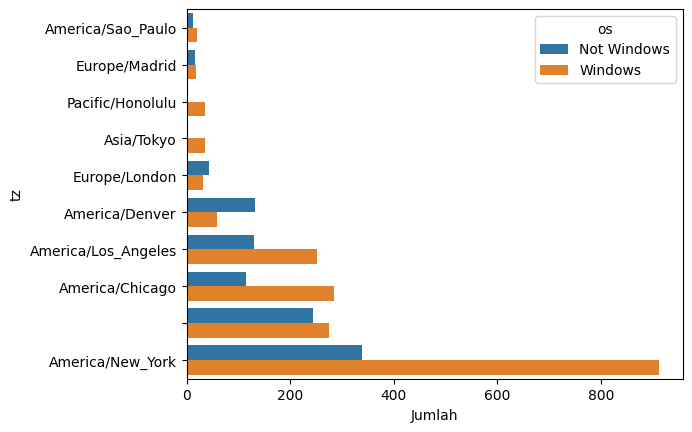

In [44]:
# Plot in a grouped bar plot
sns.barplot(x = 'Jumlah', y = 'tz', hue = 'os', data = count_subset_stack);

In [45]:
# Define a normalize function
def norm_total(group):
    group["normed_total"] = group["Jumlah"] / group["Jumlah"].sum()
    return group

# normalize the group percentages to sum = 1
res = count_subset_stack[['tz', 'Jumlah', 'os']].groupby('tz', group_keys=False).apply(norm_total)
res.head()

<ipython-input-45-794a7e9a4744>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  res = count_subset_stack[['tz', 'Jumlah', 'os']].groupby('tz', group_keys=False).apply(norm_total)


,tz,Jumlah,os,normed_total
0,America/Sao_Paulo,13.0,Not Windows,0.393939
1,America/Sao_Paulo,20.0,Windows,0.606061
2,Europe/Madrid,16.0,Not Windows,0.457143
3,Europe/Madrid,19.0,Windows,0.542857
4,Pacific/Honolulu,0.0,Not Windows,0.000000


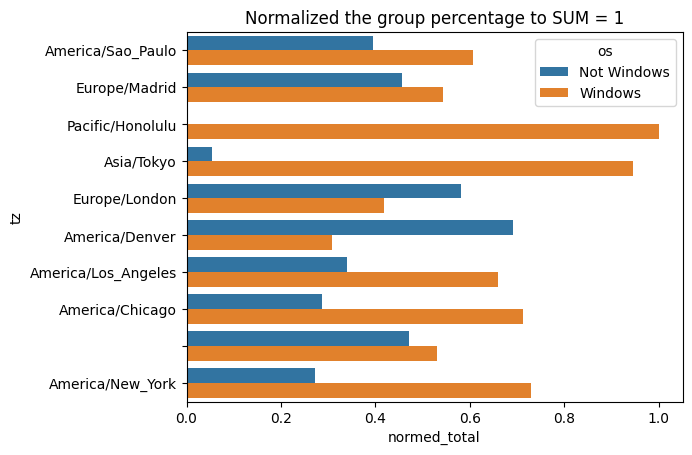

In [46]:
# Reset index to make 'tz' and 'os' as columns in the dataframe
res = res.reset_index()

# Barplot
ax = sns.barplot(x = 'normed_total', y = 'tz', hue = 'os', data=res)
ax.set_title('Normalized the group percentage to SUM = 1');

# **15.2 US Baby Names 1880–2023**
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2023 (**access date**: **2025-01-20 11:51 +8:00**).

### **Access the Popular Baby Names data here: http://tinyurl.com/2de29wz8**
* download the zipped **<font color='red'>National Data**

In [47]:
# Upload the yob2023 files
from google.colab import files
files.upload()

{}

In [48]:
# Move the yob2023.txt file to your own folder
!mv /content/yob2023.txt /content/drive/MyDrive/Colab_Notebooks/yob2023.txt

mv: cannot stat '/content/yob2023.txt': No such file or directory


In [49]:
# Using the Unix head command to look at the first 10 lines of one of the files
# This is in comma-separated format
!tail -n 5 /content/drive/MyDrive/Colab_Notebooks/yob2023.txt

Zyell,M,5
Zyen,M,5
Zymirr,M,5
Zyquan,M,5
Zyrin,M,5


In [50]:
# Load the yob2023.txt into a DataFrame with pandas.read_csv
names2023 = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/yob2023.txt',
                        names = ['name', 'sex', 'num_births'])
names2023

,name,sex,num_births
0,Olivia,F,15270
1,Emma,F,13527
2,Charlotte,F,12596
3,Amelia,F,12311
4,Sophia,F,11944
...,...,...,...
31677,Zyell,M,5
31678,Zyen,M,5
31679,Zymirr,M,5
31680,Zyquan,M,5


In [51]:
# Use groupby to calculate sum of Female and Male baby in 2023
names2023.groupby('sex')['num_births'].sum()

,num_births
sex,
F,1596022
M,1701224


### **Upload all the yob files from 1880 to 2023**

In [52]:
# important for final exam question
# assemble all of the YOB data into a single DataFrame
# add a year field
# using pandas.concat() function
pieces = []
for year in range(1880, 2024):
    path = f"/content/drive/MyDrive/Colab_Notebooks/names (1)/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "num_births"])

    # Add a column for the year
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [53]:
# Display names DataFrame
names

,name,sex,num_births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
2117214,Zyell,M,5,2023
2117215,Zyen,M,5,2023
2117216,Zymirr,M,5,2023
2117217,Zyquan,M,5,2023


In [54]:
# Aggregate the names DataFrame by year for num_births
total_births = names.pivot_table('num_births', index = 'year',
                                 columns = 'sex', aggfunc = 'sum')
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100735
1882,107847,113686
1883,112320,104625
1884,129019,114442
...,...,...
2019,1676568,1792223
2020,1614196,1723649
2021,1638188,1746499


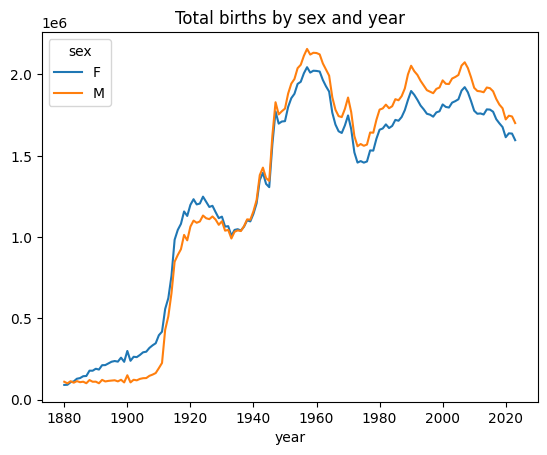

In [55]:
# Plot a line plot
total_births.plot(title = 'Total births by sex and year');

### ***Our observation:***

1. More number of female births < 1930
2. More number of male births > 1950

Read this [interesting article](https://www.pewresearch.org/short-reads/2022/08/31/global-population-skews-male-but-un-projects-parity-between-sexes-by-2050/) about ***global population***

In [56]:
# Calculate fraction of babies given each name relative to the total number of births
def add_prop(group):
    group["prop"] = group["num_births"] / group["num_births"].sum()
    return group

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

<ipython-input-56-b0de1e58ef20>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)


In [57]:
# Display names DataFrame
names

,name,sex,num_births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2117214,Zyell,M,5,2023,0.000003
2117215,Zyen,M,5,2023,0.000003
2117216,Zymirr,M,5,2023,0.000003
2117217,Zyquan,M,5,2023,0.000003


In [58]:
# Perform sanity check to ensure the prop column sums to 1 within all the groups
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2021  M      1.0
2022  F      1.0
      M      1.0
2023  F      1.0
      M      1.0
Name: prop, Length: 288, dtype: float64

In [59]:
# Extract the top 1,000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values("num_births", ascending=False)[:1000]

# Create intermediate file
grouped = names.groupby(['year', 'sex'])

# Get top 1000 data
top1K = grouped.apply(get_top1000)

# Display top1K content
top1K

<ipython-input-59-bc21f88d740b>:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1K = grouped.apply(get_top1000)


name sex  num_births  year      prop
year sex                                                   
1880 F   0             Mary   F        7065  1880  0.077642
         1             Anna   F        2604  1880  0.028617
         2             Emma   F        2003  1880  0.022012
         3        Elizabeth   F        1939  1880  0.021309
         4           Minnie   F        1746  1880  0.019188
...                     ...  ..         ...   ...       ...
2023 M   2104065   Thatcher   M         220  2023  0.000129
         2104066      Abner   M         219  2023  0.000129
         2104067     Cullen   M         219  2023  0.000129
         2104068     Damari   M         219  2023  0.000129
         2104069     Hollis   M         219  2023  0.000129

[287876 rows x 5 columns]

In [60]:
# Drop the group index
top1K = top1K.reset_index(drop=True)
top1K

,name,sex,num_births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
287871,Thatcher,M,220,2023,0.000129
287872,Abner,M,219,2023,0.000129
287873,Cullen,M,219,2023,0.000129
287874,Damari,M,219,2023,0.000129


### **Analyzing Naming Trends**

In [61]:
# split the top one thousand names into the boy and girl portions
boys = top1K[top1K['sex'] == 'M']
girld = top1K[top1K['sex'] == "F"]

In [62]:
# form a pivot table of the total number of births by year and name
total_births = top1K.pivot_table('num_births', index = 'year',
                                 columns = 'name', aggfunc = 'sum')
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,...,7.0,NaN,8.0,28.0,NaN,27.0,NaN,NaN,NaN,NaN
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,NaN,NaN,3664.0,NaN,419.0,NaN,5541.0,NaN,NaN,209.0,...,266.0,NaN,NaN,353.0,NaN,NaN,1182.0,NaN,540.0,213.0
2020,NaN,NaN,3576.0,NaN,419.0,NaN,5094.0,NaN,256.0,NaN,...,276.0,NaN,NaN,308.0,282.0,NaN,1268.0,226.0,671.0,NaN
2021,NaN,NaN,3608.0,NaN,431.0,268.0,4848.0,NaN,255.0,NaN,...,263.0,NaN,NaN,338.0,267.0,NaN,1436.0,324.0,833.0,242.0


<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1880 to 2023
Columns: 7351 entries, Aaden to Zyon
dtypes: float64(7351)
memory usage: 8.1 MB


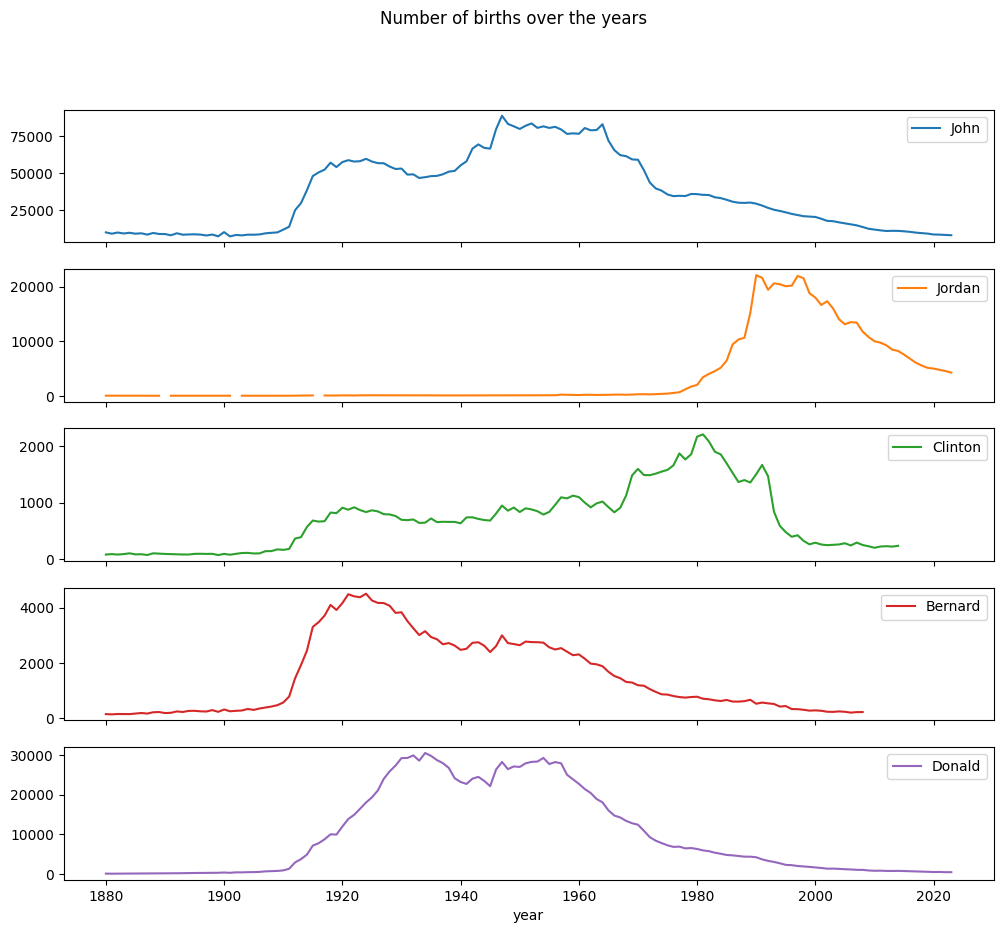

In [63]:
# Get total births info
total_births.info()

# Subset of names
subset = total_births[['John', 'Jordan', 'Clinton', 'Bernard', 'Donald']]

# Plot line plot
subset.plot(subplots = True, figsize = (12, 10),
            title = 'Number of births over the years');

### ***Our observation:***

We might conclude that these names have grown out of favor with the American population. **But is that right?**

### **Measuring the increase in naming diversity**

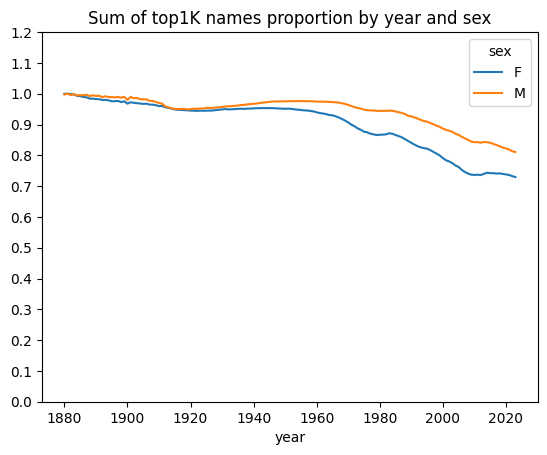

In [64]:
# Extract proportion of births represented by the top 1,000 most popular names
# aggregate year and sex
tab = top1K.pivot_table('prop', index = 'year',
                        columns = 'sex', aggfunc = 'sum')

# Line plot by year and sex
tab.plot(title = 'Sum of top1K names proportion by year and sex',
         yticks = np.linspace(0, 1.2, 13));

### ***The true explanation:***

there appears to be increasing name diversity (decreasing total proportion in the top one thousand).
* as parents become more educated, more diverse names created
* hence, the top1K name proportion decreases

### ***Boy names that became girl names (and vice versa)***

1. Another fun trend is looking at names that were **more popular with one gender earlier in the sample** but have b**ecome preferred as a name for the other gender over time**.
2. One example is the name **Lesley or Leslie**.

In [65]:
# Extract unique names from top1000
all_names = pd.Series(top1K['name'].unique())

# Extract unique names contain "Lesl"
lesley_like = all_names[all_names.str.contains('ray')]

# Display lesley_like content
lesley_like

# Extract just lesley_like names from top1K data
filtered = top1K[top1K['name'].isin(lesley_like)]

# Compute sum births grouped by name to see their relative frequencies
filtered.groupby('name')['num_births'].sum()

# aggregate by sex and year, and normalize within year
# pivot_table -> to get summarise information based on your specific criteria
tab = filtered.pivot_table('num_births', index = 'year',
                           columns = 'sex', aggfunc = 'sum')

# Display table content
tab

# Normalize within year
tab = tab.div(tab.sum(axis = 1), axis = 'index')
tab

sex,F,M
year,,
1880,0.291667,0.708333
1881,0.416667,0.583333
1882,NaN,1.000000
1883,0.333333,0.666667
1884,0.320000,0.680000
...,...,...
2019,0.023121,0.976879
2020,0.023037,0.976963
2021,0.042058,0.957942


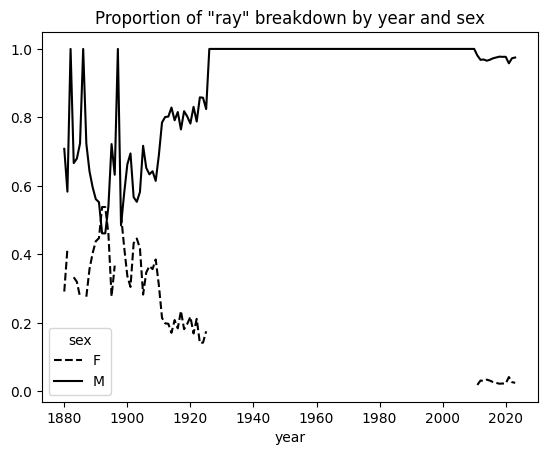

In [66]:
# line plot breakdown by sex over time for "Lesl__"
ax = tab.plot(style = {'M': 'k-', 'F':'k--'})
ax.set_title('Proportion of "ray" breakdown by year and sex');

# **15.3 The Titanic DataSet**
- download the raw data here: https://github.com/datasciencedojo/datasets/blob/master/titanic.csv?utm_source=chatgpt.com

In [67]:
# Load the Titanic dataset
# (Replace 'titanic.csv' with the correct path to your dataset file)
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv')

In [68]:
# Display top few rows of titanic dataset
# Check for Age
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
# Check for NA value in titanic age column
titanic['Age'].isna().sum()

177

In [70]:
# Replace NA in age using median of the 'Age'
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [71]:
# Check again for NA value in titanic age column
titanic['Age'].isna().sum()

0

In [72]:
# Display titanic data
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [73]:
# Determine the range of age in Titanic dataset
min_age = titanic['Age'].min()
max_age = titanic['Age'].max()
age_range = f"{min_age} to {max_age}"
print(f"Age range: {age_range}")

Age range: 0.42 to 80.0


In [74]:
# Categorize the age into label
def categorize_age(age):
    if age < 18:
        return 'children'
    elif 18 <= age < 40:
        return 'young adult'
    else:
        return 'Seniors'

titanic['Age_Group'] = titanic['Age'].apply(categorize_age)

In [75]:
# Display titanic
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,young adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,young adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,young adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,young adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,young adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,young adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,young adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,young adult
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,young adult


In [76]:
# Check for missing values in key columns
print(titanic[['Sex', 'Survived']].isnull().sum())

Sex         0
Survived    0
dtype: int64


In [77]:
# Calculate survival rates by gender
gender_survival = titanic.groupby('Sex')['Survived'].mean()
print("Survival rates by gender:")
print(gender_survival)

Survival rates by gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [78]:
# Count the number of survivors and non-survivors by gender
gender_counts = titanic.groupby(['Sex', 'Survived']).size().unstack()
print("\nCounts of survivors and non-survivors by gender:")
print(gender_counts)


Counts of survivors and non-survivors by gender:
Survived    0    1
Sex               
female     81  233
male      468  109


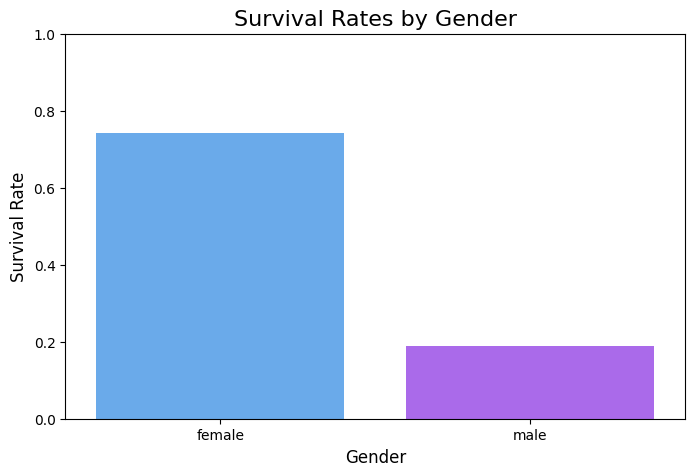

In [79]:
# Plot survival rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(x=gender_survival.index, y=gender_survival.values,
            hue=gender_survival.index, palette='cool', legend=False)
plt.title('Survival Rates by Gender', fontsize=16)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylim(0, 1)
plt.show()

In [80]:
#Survival rate vs age group by gender
age_group_survival = titanic.groupby(['Age_Group', 'Sex', 'Pclass'])['Survived'].mean().unstack()
print("\nSurvival rates by age group and gender:")
print(age_group_survival)


Survival rates by age group and gender:
Pclass                     1         2         3
Age_Group   Sex                                 
Seniors     female  0.964286  0.875000  0.100000
            male    0.283019  0.095238  0.057143
children    female  0.875000  1.000000  0.542857
            male    1.000000  0.818182  0.232558
young adult female  0.982759  0.916667  0.525253
            male    0.400000  0.078947  0.130112


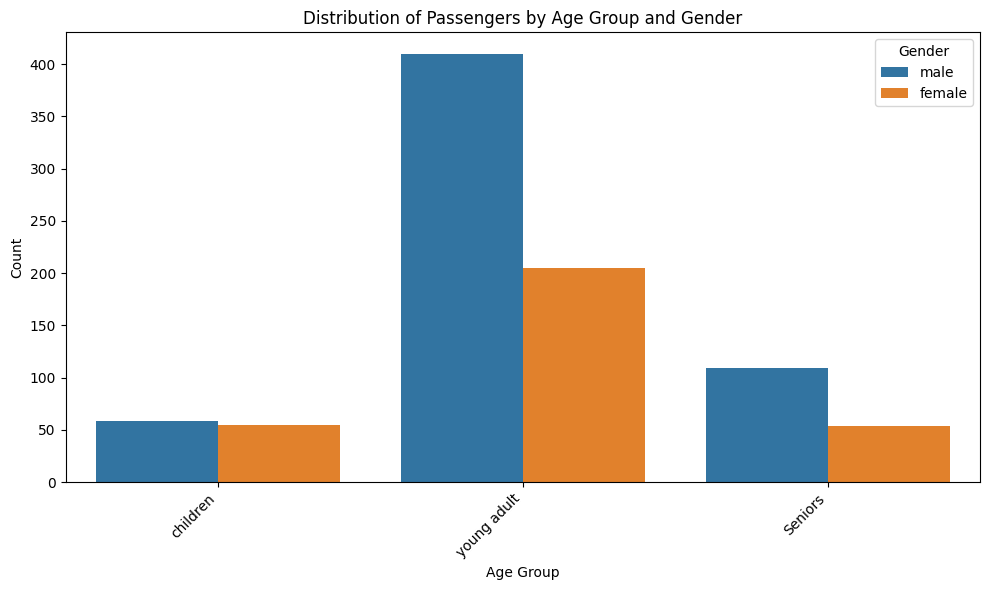

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.countplot(x='Age_Group', hue='Sex', data=titanic, order=['children','young adult', 'Seniors'])
plt.title('Distribution of Passengers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.legend(title='Gender')

plt.tight_layout()
plt.show()

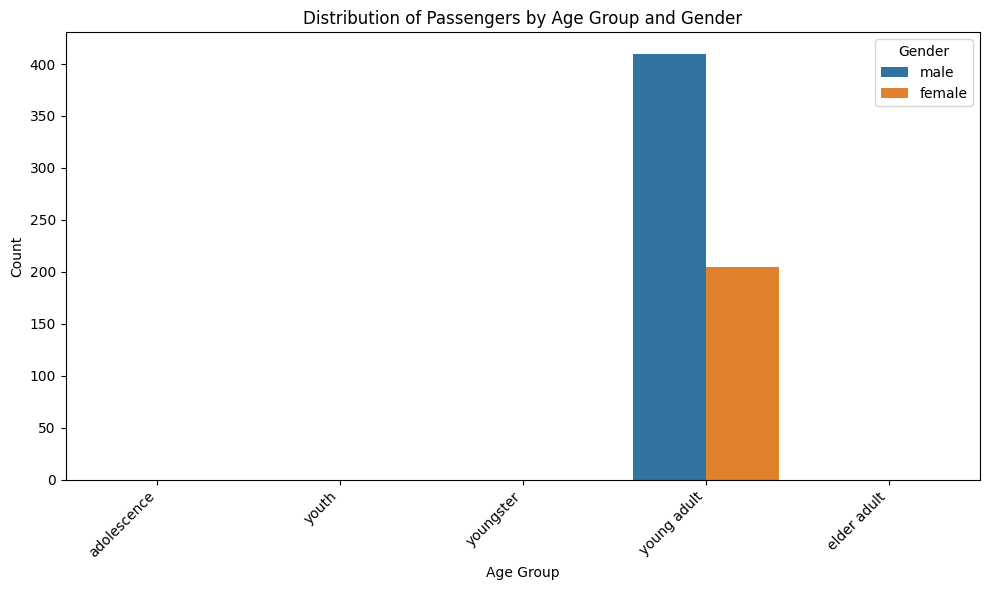

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'titanic' and has the 'Age_Group' column

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

sns.countplot(x='Age_Group', hue='Sex', data=titanic, order=['adolescence', 'youth', 'youngster', 'young adult', 'elder adult'])

plt.title('Distribution of Passengers by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.legend(title='Gender')

plt.tight_layout()
plt.show()

In [83]:
# Additional insight: Calculate survival probabilities
total_survivors = titanic['Survived'].sum()
total_passengers = titanic.shape[0]
overall_survival_probability = total_survivors / total_passengers
print(f"\nOverall survival probability: {overall_survival_probability:.2%}")


Overall survival probability: 38.38%


# Thank you for hanging there with us **since 2024-10-08**

# I hope you've gained valuable knowledge during this time!

# I'll see you all when I see you all :)

# **Best of luck on your final exam!**